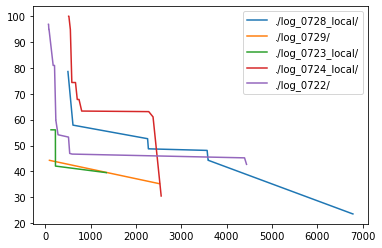

In [1]:
import os 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re

def get_timestamp(s):
    return datetime.strptime(s.split(" ")[0], '%H:%M:%S.%f')

for log in os.listdir("."):
    if not log.startswith("log"):
        continue
    dir_name = ("./" + log + "/") 
    log_file = dir_name + os.listdir(dir_name)[1]
    with open(log_file) as f:
        content = f.read()
    lines = [l for l in content.split("\n") if l.find("solution") != -1]
    start = get_timestamp(content.split("\n")[0])
    time = []
    costs = []
    for i in range(len(lines)):
        line = lines[i]
        cost = re.findall(r' [0-9][0-9].[0-9][0-9][0-9][0-9]', line)
        if not cost:
            continue
            
        if (get_timestamp(line) -start).total_seconds() < 0:
            time.append((get_timestamp(line) -start + timedelta(days=1)).total_seconds())
        else:
            time.append((get_timestamp(line) -start).total_seconds())
        costs.append(float(cost[0].strip()))

    plt.xlabel = "cost"
    plt.plot(time, costs, label = dir_name)
    plt.legend()
    plt.savefig("result.png")

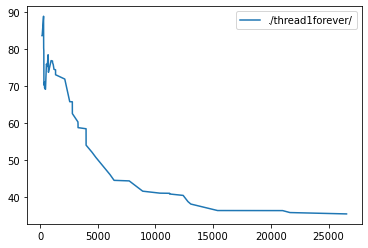

In [7]:
import os 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re
import numpy as np
from operator import itemgetter

total_trial_number = 6

def get_timestamp(s):
    return datetime.strptime(s.split(" ")[0], '%H:%M:%S.%f')

def parse_log_file(dir_name, log_name):
    log_file = dir_name + log_name
    with open(log_file) as f:
        content = f.read()
    lines = [l for l in content.split("\n") if l.find("solution") != -1]
    start = get_timestamp(content.split("\n")[0])
    time = []
    costs = []
    for i in range(len(lines)):
        line = lines[i]
        cost = re.findall(r' [0-9][0-9].[0-9][0-9][0-9][0-9]', line)
        if not cost:
            continue
            
        if (get_timestamp(line) -start).total_seconds() < 0:
            time.append((get_timestamp(line) -start + timedelta(days=1)).total_seconds())
        else:
            time.append((get_timestamp(line) -start).total_seconds())
        costs.append(float(cost[0].strip()))
    return costs, time 


for log in os.listdir("."):
    if not log.startswith("t"):
        continue
    dir_name = "./" + log +"/"
    l = []
    for log_name in os.listdir(dir_name):
        if not log_name.endswith("0"):
            continue
        costs, times = parse_log_file(dir_name, log_name )
        if not costs: 
            log_name = log_name[:-1] + '1'
            costs, times = parse_log_file(dir_name, log_name)
            if not costs: 
                log_name = log_name[:-1] + '2'
                costs, times = parse_log_file(dir_name, log_name)
                if not costs: 
                    log_name = log_name[:-1] + '3'
                    costs, times = parse_log_file(dir_name, log_name)
        trial_number = int(log_name[8])
        #nthread = int(log_name[18])
        for i in range(len(times)):
            arr = np.empty((total_trial_number,))
            arr[:] = np.NaN
            arr[trial_number] = costs[i]
            l.append([times[i], arr, trial_number])

    l = sorted(l,key=itemgetter(0))
    final_time = []
    final_cost = []
    for i in range(1, len(l)):
        old_arr = l[i-1]
        old_arr[1][l[i][2]] = l[i][1][l[i][2]]
        old_arr[0] = l[i][0]
        old_arr[2] = l[i][2]
        l[i] = old_arr.copy()
        final_time.append(old_arr[0])
        final_cost.append(np.nanmean(old_arr[1]))
        
    plt.plot(final_time, final_cost, label = dir_name)   
    plt.legend()

k20_1 13
[[7.196901082992554, array([        inf,         inf, 67.76761465,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf]), 2], [11.224888324737549, array([        inf,         inf, 48.67472073,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf]), 2], [15.252901077270508, array([        inf,         inf, 42.64127958,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf]), 2], [15.792764663696289, array([106.63525596,          inf,          inf,          inf,
                inf,          inf,          inf,          inf,
                inf,          inf,          inf,          inf,
                inf]), 0], [17.80705428123474, array([98.83898636,         inf,         inf,         inf,         inf,
           

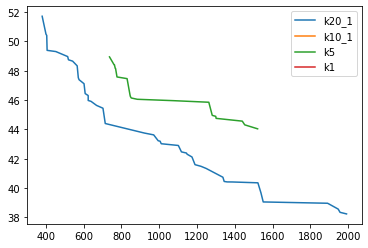

In [3]:
import os 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re
import numpy as np
from operator import itemgetter


for log in os.listdir("."):
    if not log.startswith("k"):
        continue
    with open(log) as f:
        readed = f.read()
        experiments = []
        for line in readed.split("printing waypoints"):
            experiments.append(re.findall(r'\n[0-9]+.[0-9]+, [0-9]+.[0-9]+\n', line))

        total_trial_number = len(experiments)
        print(log, total_trial_number)
        l = []
        for trial_number in range(total_trial_number):
            costs = []
            times = []
            for i in (experiments[trial_number]):
                if not i:
                    continue
                splitted = i.split(", ")
                costs.append(float(splitted[1]))
                times.append(float(splitted[0]))

            for i in range(len(times)):
                arr = np.empty((total_trial_number,))
                arr[:] = np.inf
                arr[trial_number] = costs[i]
                l.append([times[i], arr, trial_number])

        l = sorted(l,key=itemgetter(0))
        print(l)
        final_time = []
        final_cost = []
        for i in range(1, len(l)):
            old_arr = l[i-1]
            old_arr[1][l[i][2]] = l[i][1][l[i][2]]
            old_arr[0] = l[i][0]
            old_arr[2] = l[i][2]
            l[i] = old_arr.copy()
            final_time.append(old_arr[0])
            final_cost.append(np.nanmean(old_arr[1]))
        plt.plot(final_time, final_cost, label = log)   
        plt.legend()
        plt.savefig("result.png")

In [6]:
import os 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re
import numpy as np
from operator import itemgetter


for log in os.listdir("."):
    if not log.startswith("k"):
        continue
    with open(log) as f:
        print(log)
        readed = f.read()
        experiments = []
        for line in readed.split("printing waypoints"):
            experiments.append(re.findall(r'\n[0-9]+.[0-9]+, [0-9]+.[0-9]+\n', line))
        s = ""
        total_trial_number = len(experiments)
        l = []
        for trial_number in range(total_trial_number):
            s += ("T" + str(trial_number) + "\n")
            costs = []
            times = []
            for i in (experiments[trial_number]):
                if not i:
                    continue
                splitted = i.split(", ")
                costs.append(float(splitted[1]))
                times.append(float(splitted[0]))
                s+=(i.strip() + "\n")
        print(s)
        with open("proc" + log, "w") as f:
            f.write(s[:-5])

k10
T0
24.47611665725708, 96.91804624935415
30.517948389053345, 92.05665919726968
32.53203344345093, 66.38993645669603
44.61672782897949, 62.88388424693641
T1
9.98155689239502, 90.76855433994197
20.05137062072754, 63.568105015590255
46.23321485519409, 61.58479352477746
T2
8.026362180709839, 93.61787805521567
16.08188223838806, 88.78629530250103
20.110020637512207, 30.78780966375259
T3
16.84359383583069, 85.52841957640491
26.913158893585205, 83.19727998050962
28.92721152305603, 79.61436931625965
30.941253423690796, 73.42405889994336
32.955228090286255, 71.27721448755055
36.98351263999939, 65.49309016369475
T4
43.07559776306152, 139.30400307609113
49.117557764053345, 85.71202966359836
53.145668506622314, 82.35069143913849
57.173787355422974, 68.75284260845278
T5
0.046399831771850586, 36.362082163184816
T6
1.2372446060180664, 100.37244439221342
9.29298734664917, 75.46668450156321
15.335476875305176, 69.32570480403439
17.34969162940979, 55.3897254122177
33.46319580078125, 47.52722791274229